In [1]:
#https://towardsdatascience.com/build-and-deploy-machine-learning-web-app-using-pycaret-and-streamlit-28883a569104
#https://github.com/pycaret/pycaret-deployment-streamlit
pip install streamlit

  Using cached https://files.pythonhosted.org/packages/c3/88/97eef84f48fa04fbd6750e62dcceafba6c63c81b7ac1420856c8dcc0a3f9/astor-0.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bb/72/8df2e0dc991f1a1d2c6869404e7622e8ee50d80bff357dbb57c3df70305b/cachetools-4.2.1-py3-none-any.whl
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13452 sha256=4fd3bf65205c4ccf44686d4b07a6f10c566049afdae094450431021ca59a0091
  Stored in directory: C:\Users\wenny.hamilton\AppData\Local\pip\Cache\wheels\92\a0\00\8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
Note: you may need to restart the kernel to use updated packages.


In [2]:
conda activate py39


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [2]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
from pycaret.regression import *
r2 = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True,
           feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'])

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 56)"


In [4]:
# Model Training and Validation 
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3080.5266,21362814.0000,4621.9922,0.8724,-0.0000,0.3280
1,3405.0540,31559846.0000,5617.8149,0.8165,-0.0000,0.3206
2,2985.2949,23914210.0000,4890.2158,0.6972,-0.0000,0.3796
3,3131.9431,20934168.0000,4575.3872,0.8252,-0.0000,0.4442
4,3385.7014,29317694.0000,5414.5815,0.7819,-0.0000,0.3177
5,3251.9478,26735126.0000,5170.6021,0.8280,-0.0000,0.3045
6,3014.6257,27070258.0000,5202.9087,0.8158,-0.0000,0.3140
7,3540.9243,31011576.0000,5568.8037,0.8295,-0.0000,0.3280
8,3225.1970,23171972.0000,4813.7275,0.8503,-0.0000,0.3572
9,3382.1804,29852026.0000,5463.7007,0.8077,-0.0000,0.3731


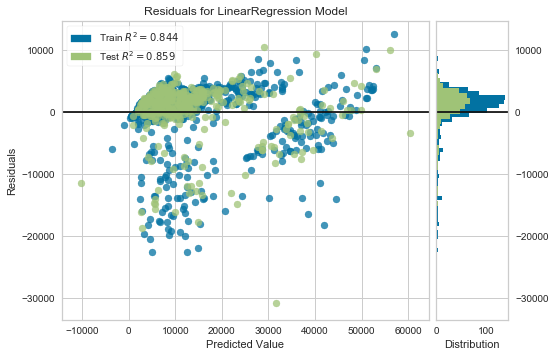

In [5]:
# plot residuals of trained model
plot_model(lr, plot = 'residuals')

In [6]:
# save transformation pipeline and model 
save_model(lr, model_name = 'deployment_28042020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs',
                  DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                              random_state=123, subclass='binary',
                              target='charges',
         

In [8]:
deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Successfully Loaded


In [9]:
deployment_28042020

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs',
                 DFS_Classic(interactions=['multiply'], ml_usecase='regression',
                             random_state=123, subclass='binary',
                             target='charges',
                          